In [2]:

import datetime 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


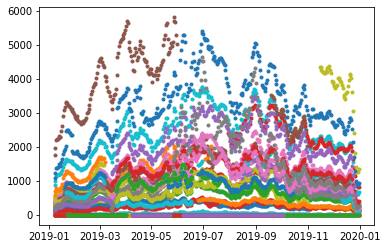

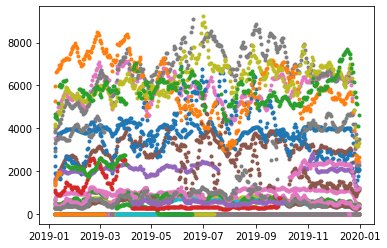

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu May 14 10:51:03 2020

@author: tsimpson
"""
df = pd.read_csv('2019_verkehrszaehlungen_werte_fussgaenger_velo.csv')



df['VELO_IN']=df['VELO_IN'].fillna(0)
df['VELO_OUT']=df['VELO_OUT'].fillna(0)
df['FUSS_IN']=df['FUSS_IN'].fillna(0)
df['FUSS_OUT']=df['FUSS_OUT'].fillna(0)
df['DATUM']= pd.to_datetime(df['DATUM']) 
df['JUST_DATE'] = df['DATUM'].dt.date


# Add a sum of all traffic variable = (sum of velos in and out and fussgaenger in and out)

Traffic_sum = df['VELO_IN']+df['VELO_OUT']+df['FUSS_IN']+df['FUSS_OUT']
Velo_sum = df['VELO_IN']+df['VELO_OUT']
Fuss_sum = df['FUSS_IN']+df['FUSS_OUT']

df['TRAFFIC_SUM'] = Traffic_sum
df['VELO_SUM'] = Velo_sum
df['FUSS_SUM'] = Fuss_sum


df2 = df.groupby(['JUST_DATE','FK_STANDORT'], as_index=False)[['TRAFFIC_SUM','VELO_SUM','FUSS_SUM']].sum()

    

numLocs = df2['FK_STANDORT'].nunique()

#plt.figure(0)
#for i in range(numLocs):
#    plt.plot(df2.loc[df2['FK_STANDORT']==df2['FK_STANDORT'][i]]['JUST_DATE'],df2.loc[df2['FK_STANDORT']==df2['FK_STANDORT'][i]]['VELO_SUM'])
    
#plt.figure(1)
#for i in range(numLocs):
#    plt.plot(df2.loc[df2['FK_STANDORT']==df2['FK_STANDORT'][i]]['JUST_DATE'],df2.loc[df2['FK_STANDORT']==df2['FK_STANDORT'][i]]['FUSS_SUM'])

## New thin
    
velosday = df2.pivot_table('VELO_SUM', ['JUST_DATE'], 'FK_STANDORT')
velosday = velosday.rolling(7).mean()


plt.figure(2)
plt.plot(velosday.index,velosday[:],'.');



fussday = df2.pivot_table('FUSS_SUM', ['JUST_DATE'], 'FK_STANDORT')
fussday = fussday.rolling(7).mean()


plt.figure(3)
plt.plot(fussday.index,fussday[:],'.');


Now lets take only the measurement points showing the highest values just to make things a little clearer


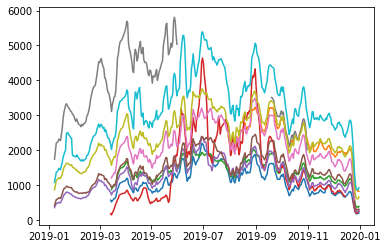

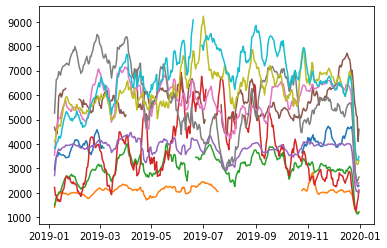

In [5]:
temp = velosday.sum()
templist = temp.to_numpy()
ind = np.argsort(templist)

LocInds = ind[-10:]

Velosday = velosday.iloc[:,LocInds]
plt.figure()
plt.plot(Velosday.index,Velosday[:]);


temp = fussday.sum()
templist = temp.to_numpy()
ind = np.argsort(templist)

LocInds = ind[-10:]

Fussday = fussday.iloc[:,LocInds]

plt.figure()
plt.plot(Fussday.index,Fussday[:]);

Text(0.5, 1.0, 'Total Count')

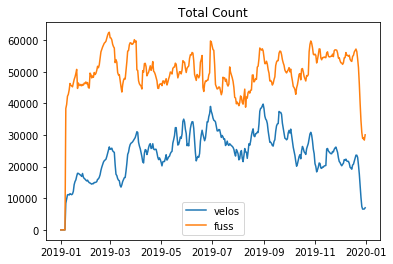

In [38]:
velosdayTotal = velosday.sum(axis=1)
fussdayTotal = fussday.sum(axis=1)

plt.plot(velosdayTotal.index,velosdayTotal[:], label= 'velos')
plt.plot(fussdayTotal.index, fussdayTotal[:], label = 'fuss')
plt.legend()
plt.title('Total Count')


<bound method NDFrame.head of             Temp  precipitation
Date                           
2019-01-01   5.7            0.0
2019-01-01   5.7            0.0
2019-01-01   5.6            0.0
2019-01-01   5.6            0.0
2019-01-01   5.6            0.0
...          ...            ...
2019-12-31   0.1            0.0
2019-12-31   0.2            0.0
2019-12-31   0.2            0.0
2019-12-31   0.2            0.0
2019-12-31   0.2            0.0

[52505 rows x 2 columns]>


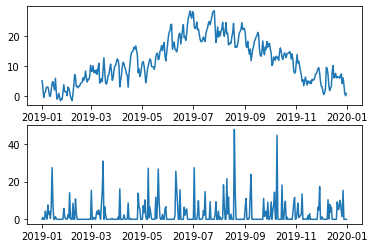

In [31]:
weather = pd.read_csv('messwerte_mythenquai_2007-2019.csv')
data_top = weather.head
weather['timestamp_cet']= pd.to_datetime(weather['timestamp_cet']) 

weatherdf = pd.DataFrame()
weatherdf['Date'] = weather['timestamp_cet'].dt.date
weatherdf['Temp'] = weather['air_temperature']
weatherdf['precipitation'] = weather['precipitation']


startdate = pd.to_datetime("2019-1-1").date()
enddate = pd.to_datetime("2019-12-31").date()

weatherdf = weatherdf.set_index(['Date'])
weatherdf = weatherdf.loc[startdate:enddate]

print(weatherdf.head)

weatherdfGroup = weatherdf.groupby(['Date'])
function_dict = {"Temp":"mean", "precipitation":"sum"}
weatherdfGroup = weatherdfGroup.aggregate(function_dict)

plt.figure()
plt.subplot(2,1,1)
plt.plot(weatherdfGroup.index,weatherdfGroup['Temp'])
plt.subplot(2,1,2)
plt.plot(weatherdfGroup.index, weatherdfGroup['precipitation'])


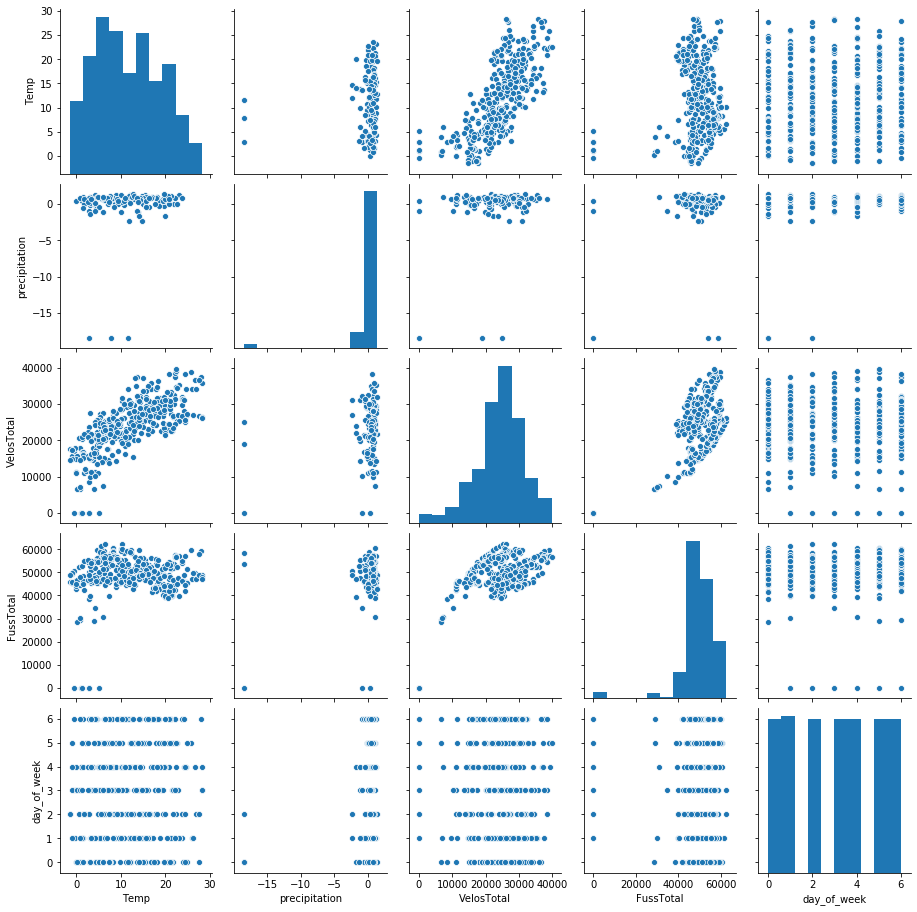

In [53]:
CompDF = weatherdfGroup
CompDF['VelosTotal'] = velosdayTotal[:]
CompDF['FussTotal'] = fussdayTotal[:]
CompDF['Date'] = pd.to_datetime(CompDF.index)
CompDF['day_of_week'] = CompDF['Date'].dt.dayofweek


#CompDF['day_of_week'] = pd.Series(CompDF.index).dt.dayofweek


import seaborn as sns
sns.pairplot(CompDF)



In [90]:
#Lets load some more years data

Data_2019_raw = pd.read_csv('https://data.stadt-zuerich.ch/dataset/83ca481f-275c-417b-9598-3902c481e400/resource/33b3e7d3-f662-43e8-b018-e4b1a254f1f4/download/2019_verkehrszaehlungen_werte_fussgaenger_velo.csv')
Data_2018_raw = pd.read_csv('https://data.stadt-zuerich.ch/dataset/83ca481f-275c-417b-9598-3902c481e400/resource/87147138-ff50-4631-ad0d-f1d3aaf6af30/download/2018_verkehrszaehlungen_werte_fussgaenger_velo.csv')
Data_2017_raw = pd.read_csv('https://data.stadt-zuerich.ch/dataset/83ca481f-275c-417b-9598-3902c481e400/resource/548ad6a6-2f8c-4af6-80eb-789a751d4ffd/download/2017_verkehrszaehlungen_werte_fussgaenger_velo.csv')
Data_2016_raw = pd.read_csv('https://data.stadt-zuerich.ch/dataset/83ca481f-275c-417b-9598-3902c481e400/resource/6a1626c9-1547-4030-b0d7-ff9226087385/download/2016_verkehrszaehlungen_werte_fussgaenger_velo.csv')
Data_2015_raw = pd.read_csv('https://data.stadt-zuerich.ch/dataset/83ca481f-275c-417b-9598-3902c481e400/resource/0b7d6081-cb18-4052-a776-36185127353d/download/2015_verkehrszaehlungen_werte_fussgaenger_velo.csv')
Data_2014_raw = pd.read_csv('https://data.stadt-zuerich.ch/dataset/83ca481f-275c-417b-9598-3902c481e400/resource/83d84c74-e879-4da7-9b84-e9453df2c186/download/2014_verkehrszaehlungen_werte_fussgaenger_velo.csv')
Data_2013_raw = pd.read_csv('https://data.stadt-zuerich.ch/dataset/83ca481f-275c-417b-9598-3902c481e400/resource/a18ec58b-8e37-4a08-a2ca-1024213b1926/download/2013_verkehrszaehlungen_werte_fussgaenger_velo.csv')
Data_2012_raw = pd.read_csv('https://data.stadt-zuerich.ch/dataset/83ca481f-275c-417b-9598-3902c481e400/resource/68028f00-c8cc-43aa-9c52-2c2dcb290620/download/2012_verkehrszaehlungen_werte_fussgaenger_velo.csv')
Data_2011_raw = pd.read_csv('https://data.stadt-zuerich.ch/dataset/83ca481f-275c-417b-9598-3902c481e400/resource/ba48be9c-f694-4408-a493-10fe1c4dd080/download/2011_verkehrszaehlungen_werte_fussgaenger_velo.csv')
Data_2010_raw = pd.read_csv('https://data.stadt-zuerich.ch/dataset/83ca481f-275c-417b-9598-3902c481e400/resource/d846bd8b-ae61-4221-bd3e-dc21a1617153/download/2010_verkehrszaehlungen_werte_fussgaenger_velo.csv')


In [91]:
Data_2019 = pd.DataFrame()
Data_2019_raw['DATUM']= pd.to_datetime(Data_2019_raw['DATUM']) 
Data_2019['Date'] = Data_2019_raw['DATUM'].dt.date
Data_2019['Loc'] = Data_2019_raw['FK_STANDORT']
Data_2019['Velos'] = Data_2019_raw['VELO_IN']+Data_2019_raw['VELO_OUT']
Data_2019['Fuss'] = Data_2019_raw['FUSS_IN']+Data_2019_raw['FUSS_OUT']
Data_2019['Date'] = pd.to_datetime(Data_2019['Date'])
Data_2019['day_of_week'] = Data_2019['Date'].dt.dayofweek

Data_2018 = pd.DataFrame()
Data_2018_raw['DATUM']= pd.to_datetime(Data_2018_raw['DATUM']) 
Data_2018['Date'] = Data_2018_raw['DATUM'].dt.date
Data_2018['Loc'] = Data_2018_raw['FK_STANDORT']
Data_2018['Velos'] = Data_2018_raw['VELO_IN']+Data_2018_raw['VELO_OUT']
Data_2018['Fuss'] = Data_2018_raw['FUSS_IN']+Data_2018_raw['FUSS_OUT']
Data_2018['Date'] = pd.to_datetime(Data_2018['Date'])
Data_2018['day_of_week'] = Data_2018['Date'].dt.dayofweek

Data_2017 = pd.DataFrame()
Data_2017_raw['DATUM']= pd.to_datetime(Data_2017_raw['DATUM']) 
Data_2017['Date'] = Data_2017_raw['DATUM'].dt.date
Data_2017['Loc'] = Data_2017_raw['FK_STANDORT']
Data_2017['Velos'] = Data_2017_raw['VELO_IN']+Data_2017_raw['VELO_OUT']
Data_2017['Fuss'] = Data_2017_raw['FUSS_IN']+Data_2017_raw['FUSS_OUT']
Data_2017['Date'] = pd.to_datetime(Data_2017['Date'])
Data_2017['day_of_week'] = Data_2017['Date'].dt.dayofweek

Data_2016 = pd.DataFrame()
Data_2016_raw['DATUM']= pd.to_datetime(Data_2016_raw['DATUM']) 
Data_2016['Date'] = Data_2016_raw['DATUM'].dt.date
Data_2016['Loc'] = Data_2016_raw['FK_STANDORT']
Data_2016['Velos'] = Data_2016_raw['VELO_IN']+Data_2016_raw['VELO_OUT']
Data_2016['Fuss'] = Data_2016_raw['FUSS_IN']+Data_2016_raw['FUSS_OUT']
Data_2016['Date'] = pd.to_datetime(Data_2016['Date'])
Data_2016['day_of_week'] = Data_2016['Date'].dt.dayofweek

Data_2015 = pd.DataFrame()
Data_2015_raw['DATUM']= pd.to_datetime(Data_2015_raw['DATUM']) 
Data_2015['Date'] = Data_2015_raw['DATUM'].dt.date
Data_2015['Loc'] = Data_2015_raw['FK_STANDORT']
Data_2015['Velos'] = Data_2015_raw['VELO_IN']+Data_2015_raw['VELO_OUT']
Data_2015['Fuss'] = Data_2015_raw['FUSS_IN']+Data_2015_raw['FUSS_OUT']
Data_2015['Date'] = pd.to_datetime(Data_2015['Date'])
Data_2015['day_of_week'] = Data_2015['Date'].dt.dayofweek

Data_2014 = pd.DataFrame()
Data_2014_raw['DATUM']= pd.to_datetime(Data_2014_raw['DATUM']) 
Data_2014['Date'] = Data_2014_raw['DATUM'].dt.date
Data_2014['Loc'] = Data_2014_raw['FK_STANDORT']
Data_2014['Velos'] = Data_2014_raw['VELO_IN']+Data_2014_raw['VELO_OUT']
Data_2014['Fuss'] = Data_2014_raw['FUSS_IN']+Data_2014_raw['FUSS_OUT']
Data_2014['Date'] = pd.to_datetime(Data_2014['Date'])
Data_2014['day_of_week'] = Data_2014['Date'].dt.dayofweek

Data_2013 = pd.DataFrame()
Data_2013_raw['DATUM']= pd.to_datetime(Data_2013_raw['DATUM']) 
Data_2013['Date'] = Data_2013_raw['DATUM'].dt.date
Data_2013['Loc'] = Data_2013_raw['FK_STANDORT']
Data_2013['Velos'] = Data_2013_raw['VELO_IN']+Data_2013_raw['VELO_OUT']
Data_2013['Fuss'] = Data_2013_raw['FUSS_IN']+Data_2013_raw['FUSS_OUT']
Data_2013['Date'] = pd.to_datetime(Data_2013['Date'])
Data_2013['day_of_week'] = Data_2013['Date'].dt.dayofweek

Data_2012 = pd.DataFrame()
Data_2012_raw['DATUM']= pd.to_datetime(Data_2012_raw['DATUM']) 
Data_2012['Date'] = Data_2012_raw['DATUM'].dt.date
Data_2012['Loc'] = Data_2012_raw['FK_STANDORT']
Data_2012['Velos'] = Data_2012_raw['VELO_IN']+Data_2012_raw['VELO_OUT']
Data_2012['Fuss'] = Data_2012_raw['FUSS_IN']+Data_2012_raw['FUSS_OUT']
Data_2012['Date'] = pd.to_datetime(Data_2012['Date'])
Data_2012['day_of_week'] = Data_2012['Date'].dt.dayofweek

Data_2011 = pd.DataFrame()
Data_2011_raw['DATUM']= pd.to_datetime(Data_2011_raw['DATUM']) 
Data_2011['Date'] = Data_2011_raw['DATUM'].dt.date
Data_2011['Loc'] = Data_2011_raw['FK_STANDORT']
Data_2011['Velos'] = Data_2011_raw['VELO_IN']+Data_2011_raw['VELO_OUT']
Data_2011['Fuss'] = Data_2011_raw['FUSS_IN']+Data_2011_raw['FUSS_OUT']
Data_2011['Date'] = pd.to_datetime(Data_2011['Date'])
Data_2011['day_of_week'] = Data_2011['Date'].dt.dayofweek

Data_2010 = pd.DataFrame()
Data_2010_raw['DATUM']= pd.to_datetime(Data_2010_raw['DATUM']) 
Data_2010['Date'] = Data_2010_raw['DATUM'].dt.date
Data_2010['Loc'] = Data_2010_raw['FK_STANDORT']
Data_2010['Velos'] = Data_2010_raw['VELO_IN']+Data_2010_raw['VELO_OUT']
Data_2010['Fuss'] = Data_2010_raw['FUSS_IN']+Data_2010_raw['FUSS_OUT']
Data_2010['Date'] = pd.to_datetime(Data_2010['Date'])
Data_2010['day_of_week'] = Data_2010['Date'].dt.dayofweek

Data = pd.concat([Data_2010, Data_2011,Data_2012, Data_2013, Data_2014,Data_2015,Data_2016,Data_2017,Data_2018,Data_2019],axis=0)

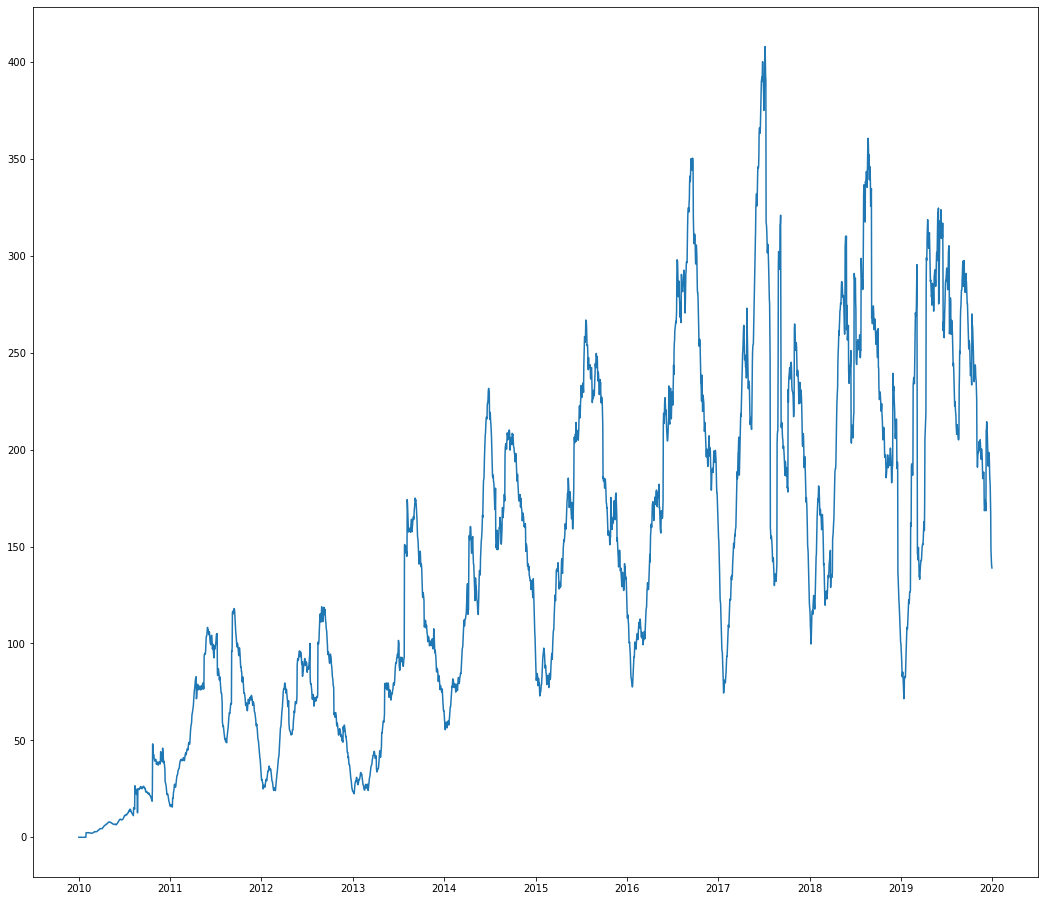

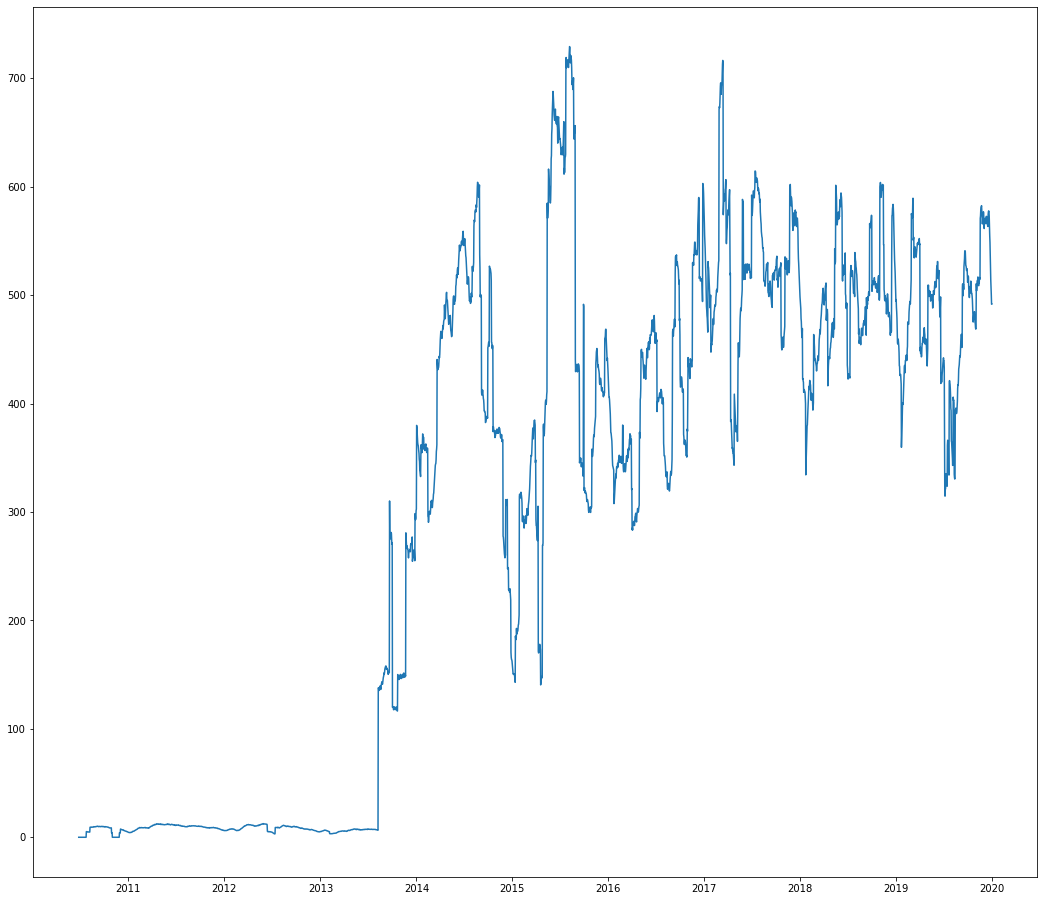

In [92]:
velos_per_day = Data.pivot_table('Velos', ['Date'], 'Loc')
velos_per_day = velos_per_day.rolling(30).mean()
velos_per_day_total = velos_per_day.sum(axis=1)

plt.figure(figsize=(18, 16))
plt.plot(velos_per_day_total.index,velos_per_day_total[:]);

fuss_per_day = Data.pivot_table('Fuss', ['Date'], 'Loc')
fuss_per_day = fuss_per_day.rolling(30).mean()
fuss_per_day_total = fuss_per_day.sum(axis=1)

plt.figure(figsize=(18,16))
plt.plot(fuss_per_day_total.index,fuss_per_day_total[:]);